In [4]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
plt.style.use("ggplot")
sns.set_style("whitegrid")

In [5]:
df = pd.read_csv(r"C:\Users\areeb\Desktop\Power BI\churn data & images\Churn_Modelling.csv")

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [8]:
df.shape

(10002, 14)

In [9]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
df.drop(columns = "RowNumber", axis = 1, inplace = True)

In [11]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000200e+04,10002.000000,10001.000000,10002.000000,10002.000000,10002.000000,10001.000000,10001.000000,10002.000000,10002.000000
mean,1.569093e+07,650.555089,38.922311,5.012498,76491.112875,1.530194,0.705529,0.514949,100083.331145,0.203759
std,7.193177e+04,96.661615,10.487200,2.891973,62393.474144,0.581639,0.455827,0.499801,57508.117802,0.402812
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,1.562852e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50983.750000,0.000000
50%,1.569073e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100185.240000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127647.840000,2.000000,1.000000,1.000000,149383.652500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [12]:
df.describe(include = "object")

,Surname,Geography,Gender
count,10002,10001,10002
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5458


In [13]:
cat = df.select_dtypes(include = "object")

In [14]:
num = df.select_dtypes(exclude = "object")

In [15]:
n_col = num.columns

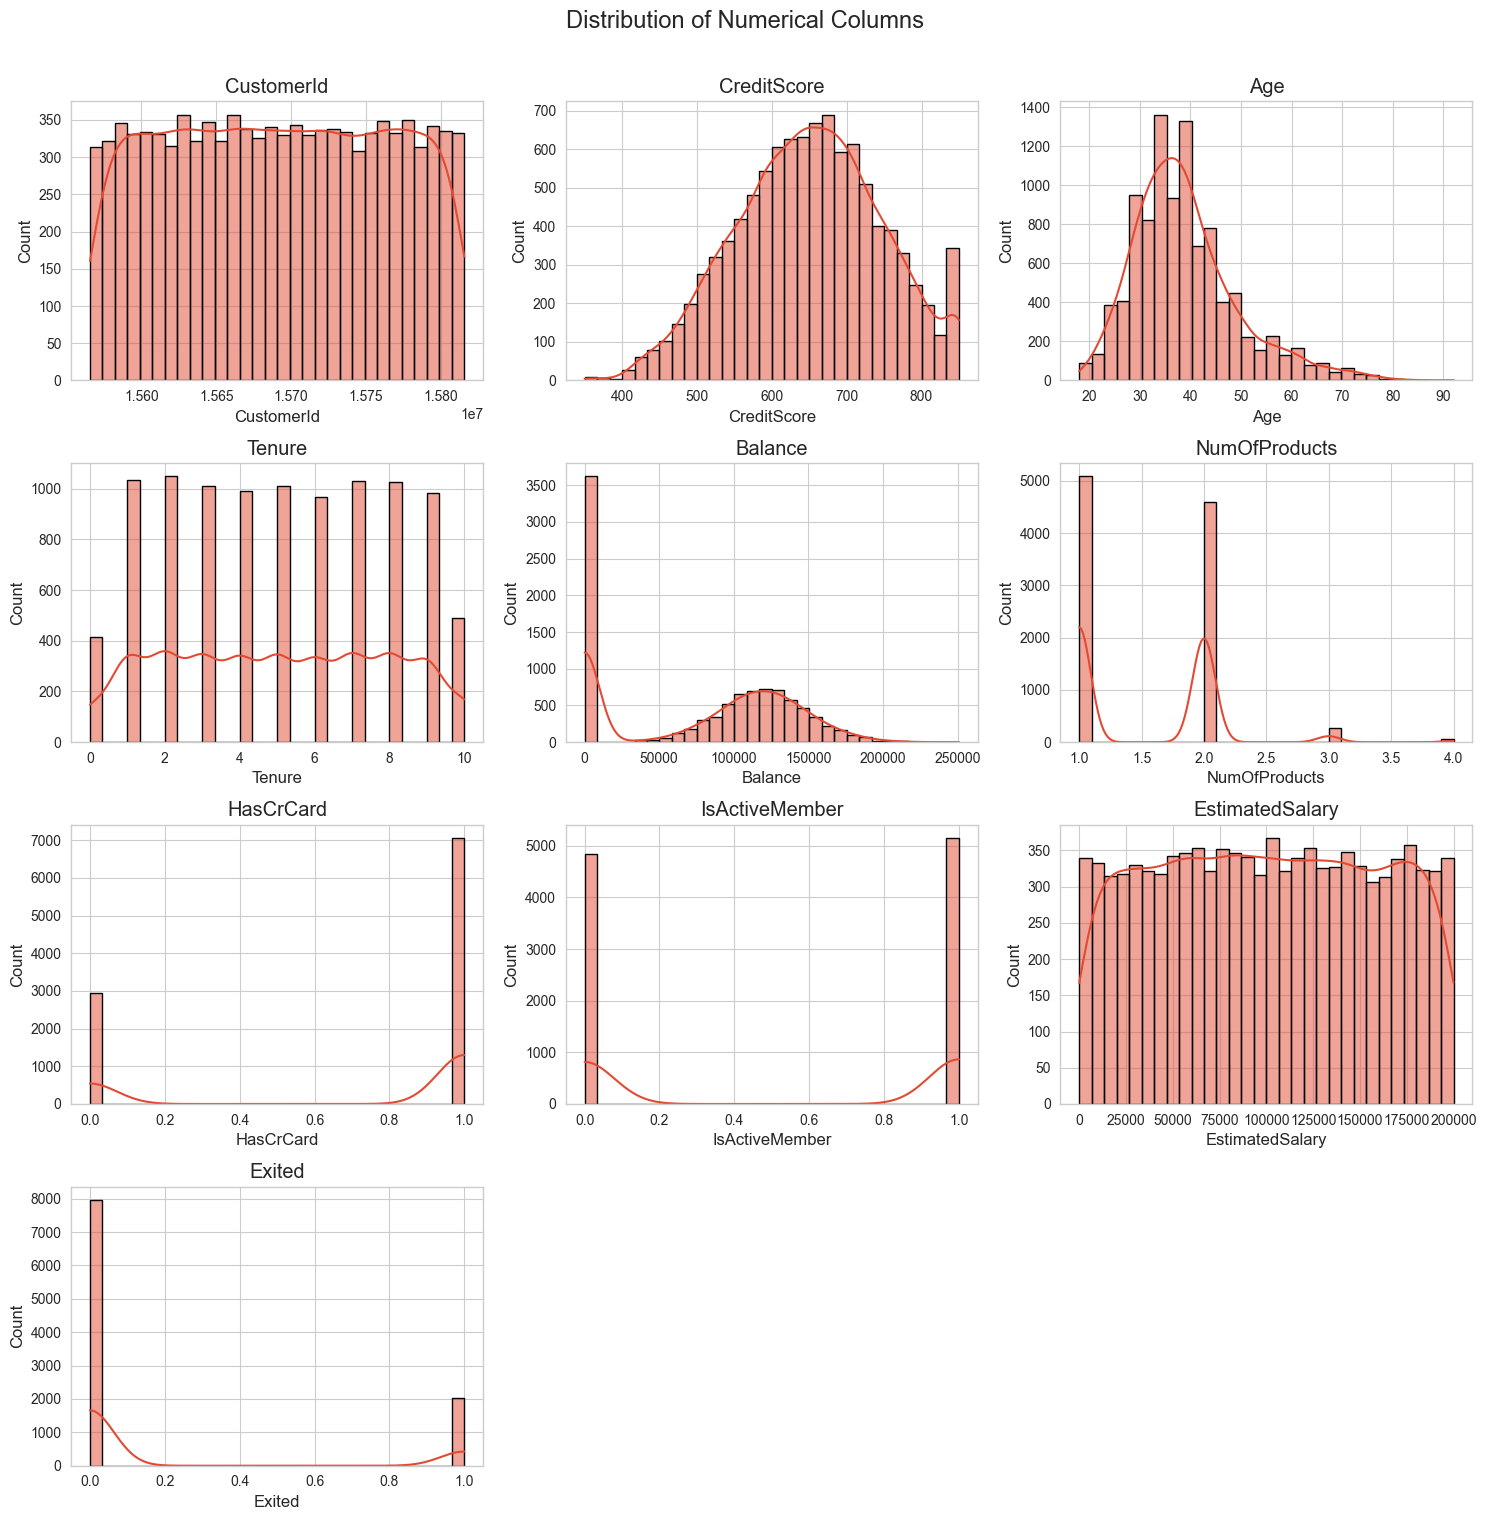

In [16]:
plt.figure( figsize = (15,15) )

for index, col in enumerate(n_col, start = 1):
    plt.subplot(4,3, index)
    sns.histplot(df[col], edgecolor = "k", linewidth = 1, bins = 30, kde = True)
    plt.title(col)

plt.suptitle("Distribution of Numerical Columns", size = 17, y = 1.01)
plt.tight_layout()
plt.show()

In [17]:
c_col = cat.columns
c_col = ['Geography', 'Gender']

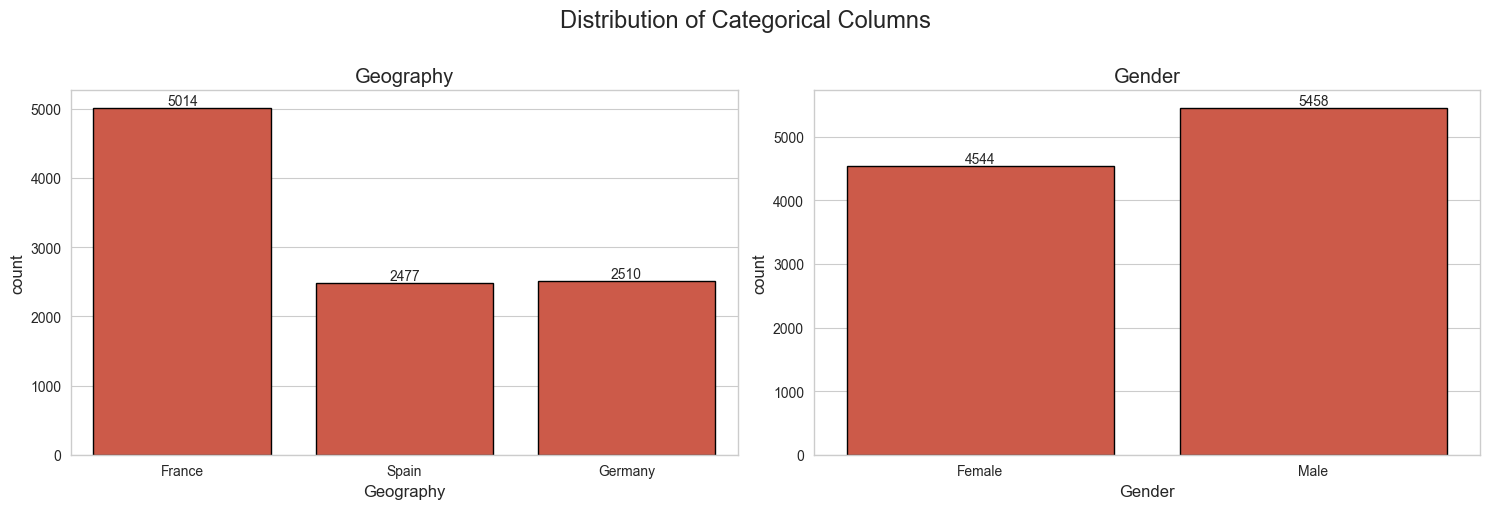

In [18]:
plt.figure( figsize = (15,5) )

for index, col in enumerate(c_col, start = 1):
    plt.subplot(1,2, index)
    ax = sns.countplot( x = df[col], edgecolor = "k", linewidth = 1)
    plt.title(col)

    for i in ax.containers:
        ax.bar_label(i)

plt.suptitle("Distribution of Categorical Columns", size = 17, y = 1.01)
plt.tight_layout()
plt.show()

In [19]:
for col in c_col:
    df[col] = df[col].fillna( df[col].mode()[0])

In [20]:
df["Age"] = df["Age"].fillna(df["Age"].mean())

In [21]:
df["HasCrCard"] = df["HasCrCard"].fillna(0.0)

In [22]:
df["IsActiveMember"] = df["IsActiveMember"].fillna(0.0)

In [23]:
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [24]:
df[df.duplicated()]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10001,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [25]:
df.duplicated().sum()

2

In [26]:
df = df.drop_duplicates()

In [27]:
df.duplicated().sum()

0

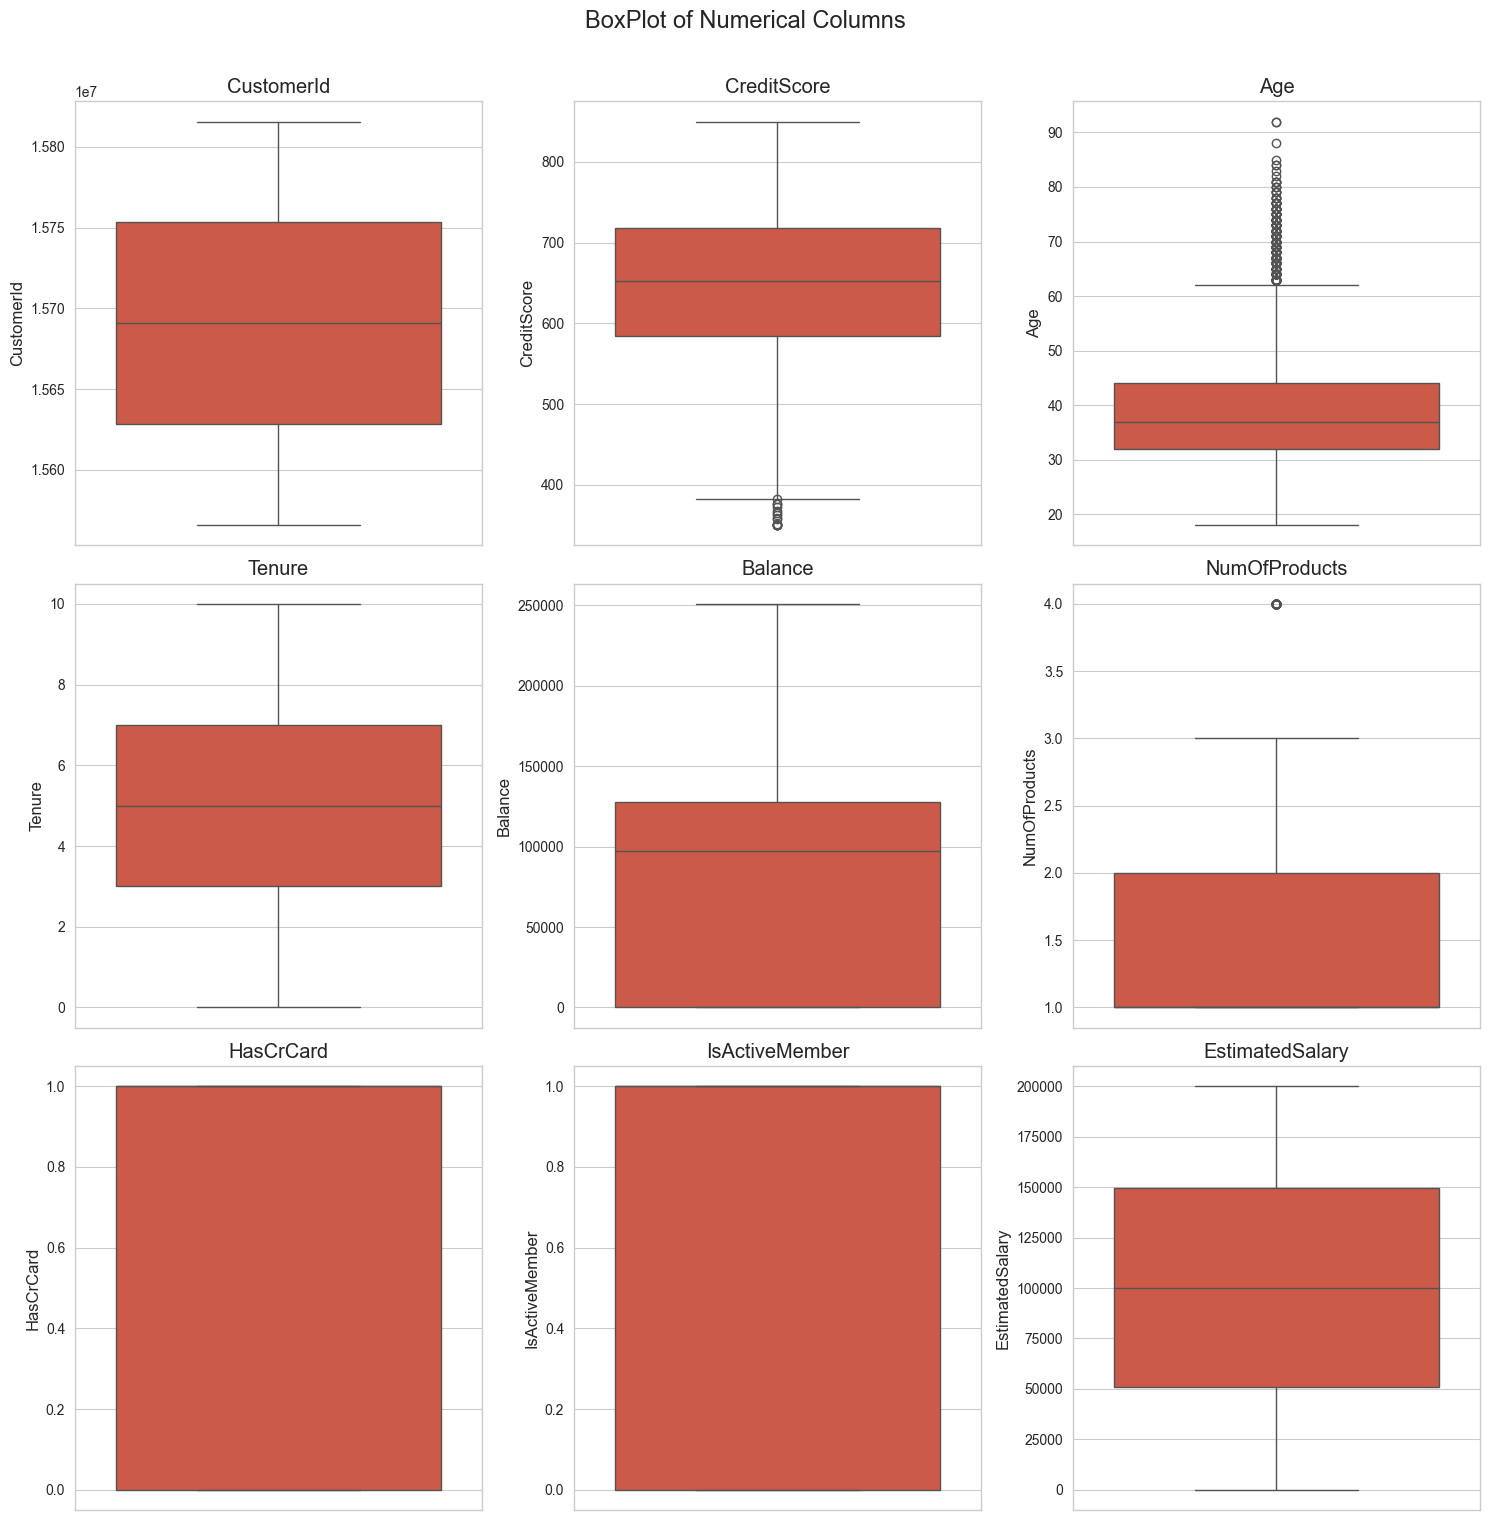

In [33]:
plt.figure( figsize = (15,15) )

for index, col in enumerate(df.select_dtypes(exclude = "object").columns[:9] , start = 1):
    plt.subplot(3,3, index)
    sns.boxplot(df[col])
    plt.title(col)

plt.suptitle("BoxPlot of Numerical Columns", size = 17, y = 1.01)
plt.tight_layout()
plt.show()

In [34]:
df.drop( columns = "CustomerId", axis = 1, inplace = True)

In [35]:
df.drop( columns = "Surname", axis = 1, inplace = True)

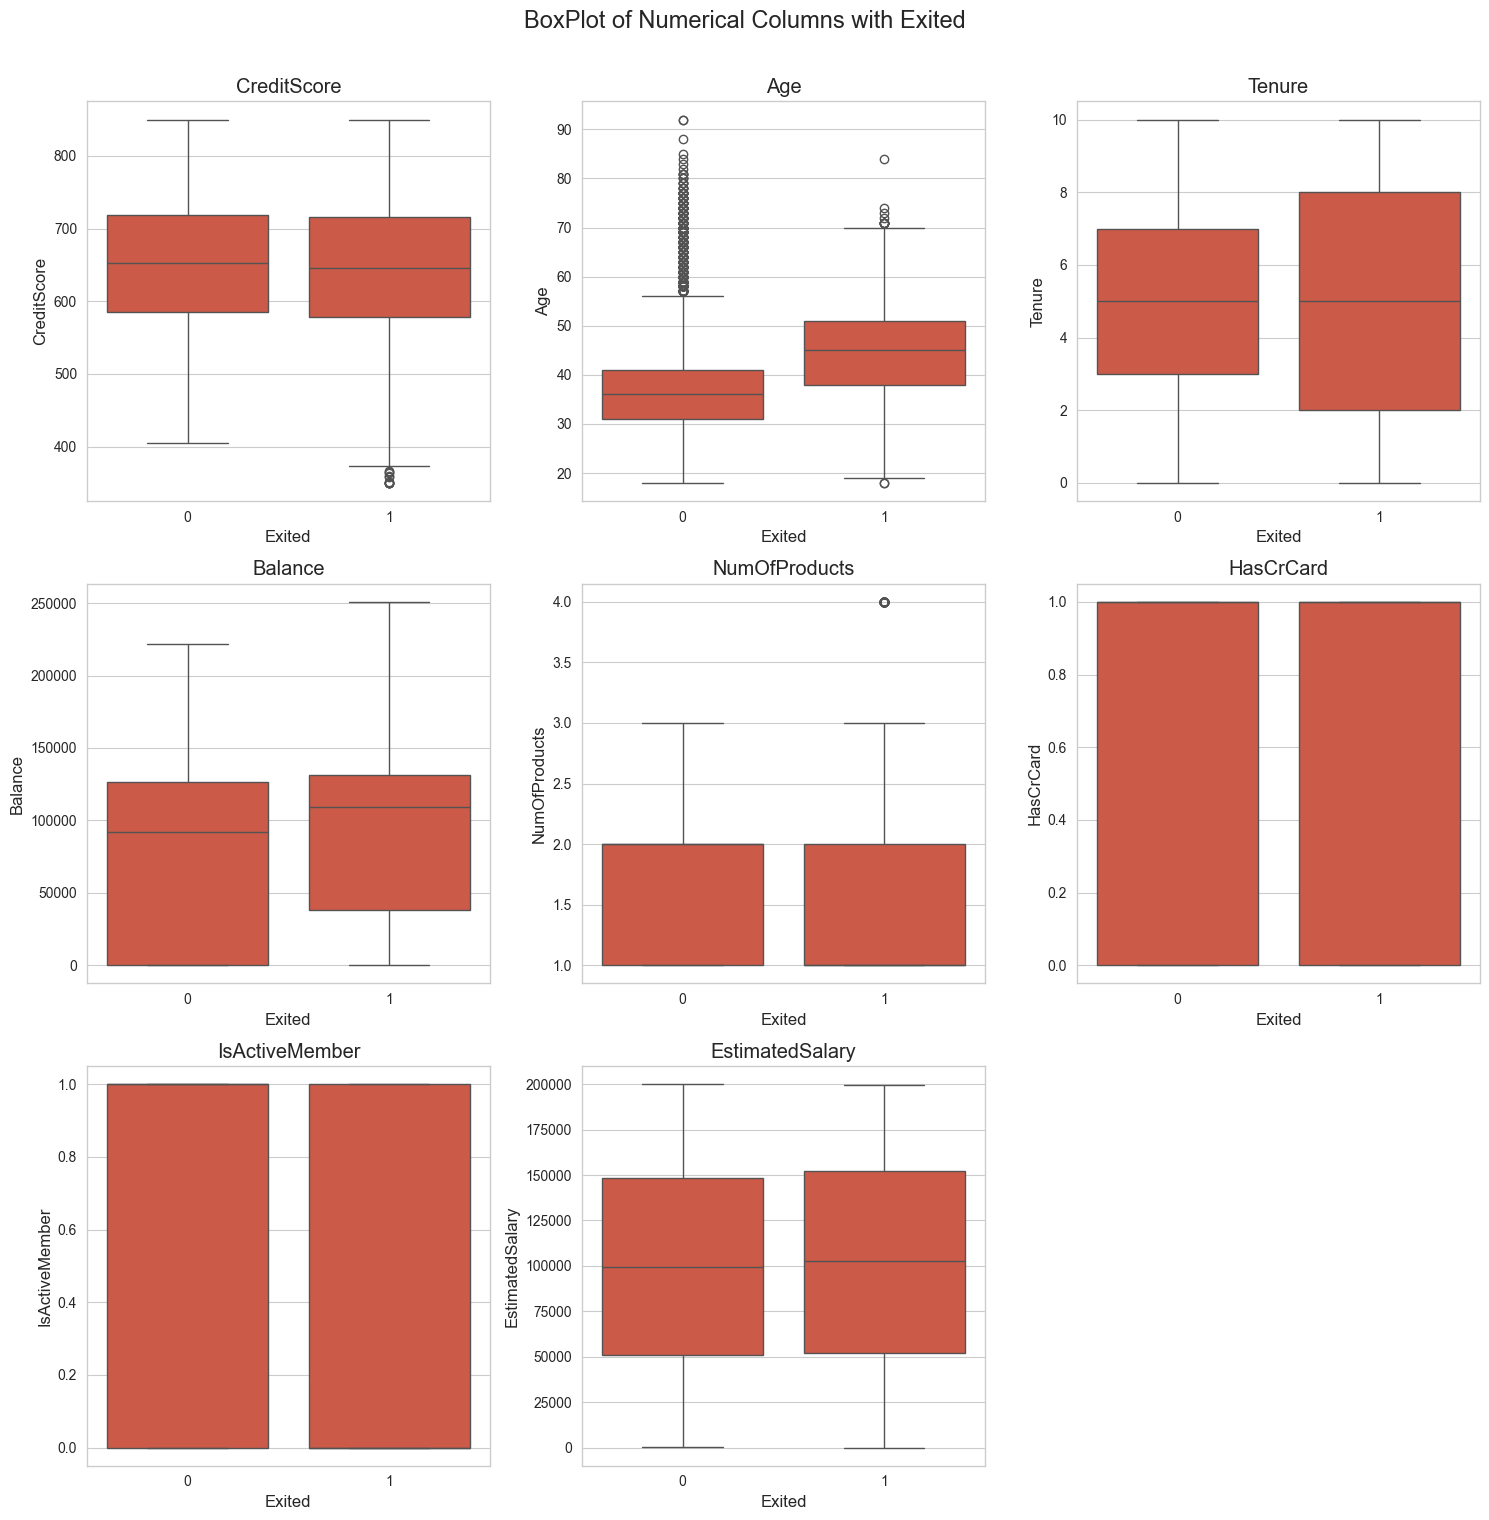

In [36]:
plt.figure( figsize = (15,15) )

for index, col in enumerate(df.select_dtypes(exclude = "object").columns[:8] , start = 1):
    plt.subplot(3,3, index)
    sns.boxplot(y = df[col], x = df["Exited"])
    plt.title(col)

plt.suptitle("BoxPlot of Numerical Columns with Exited", size = 17, y = 1.01)
plt.tight_layout()
plt.show()

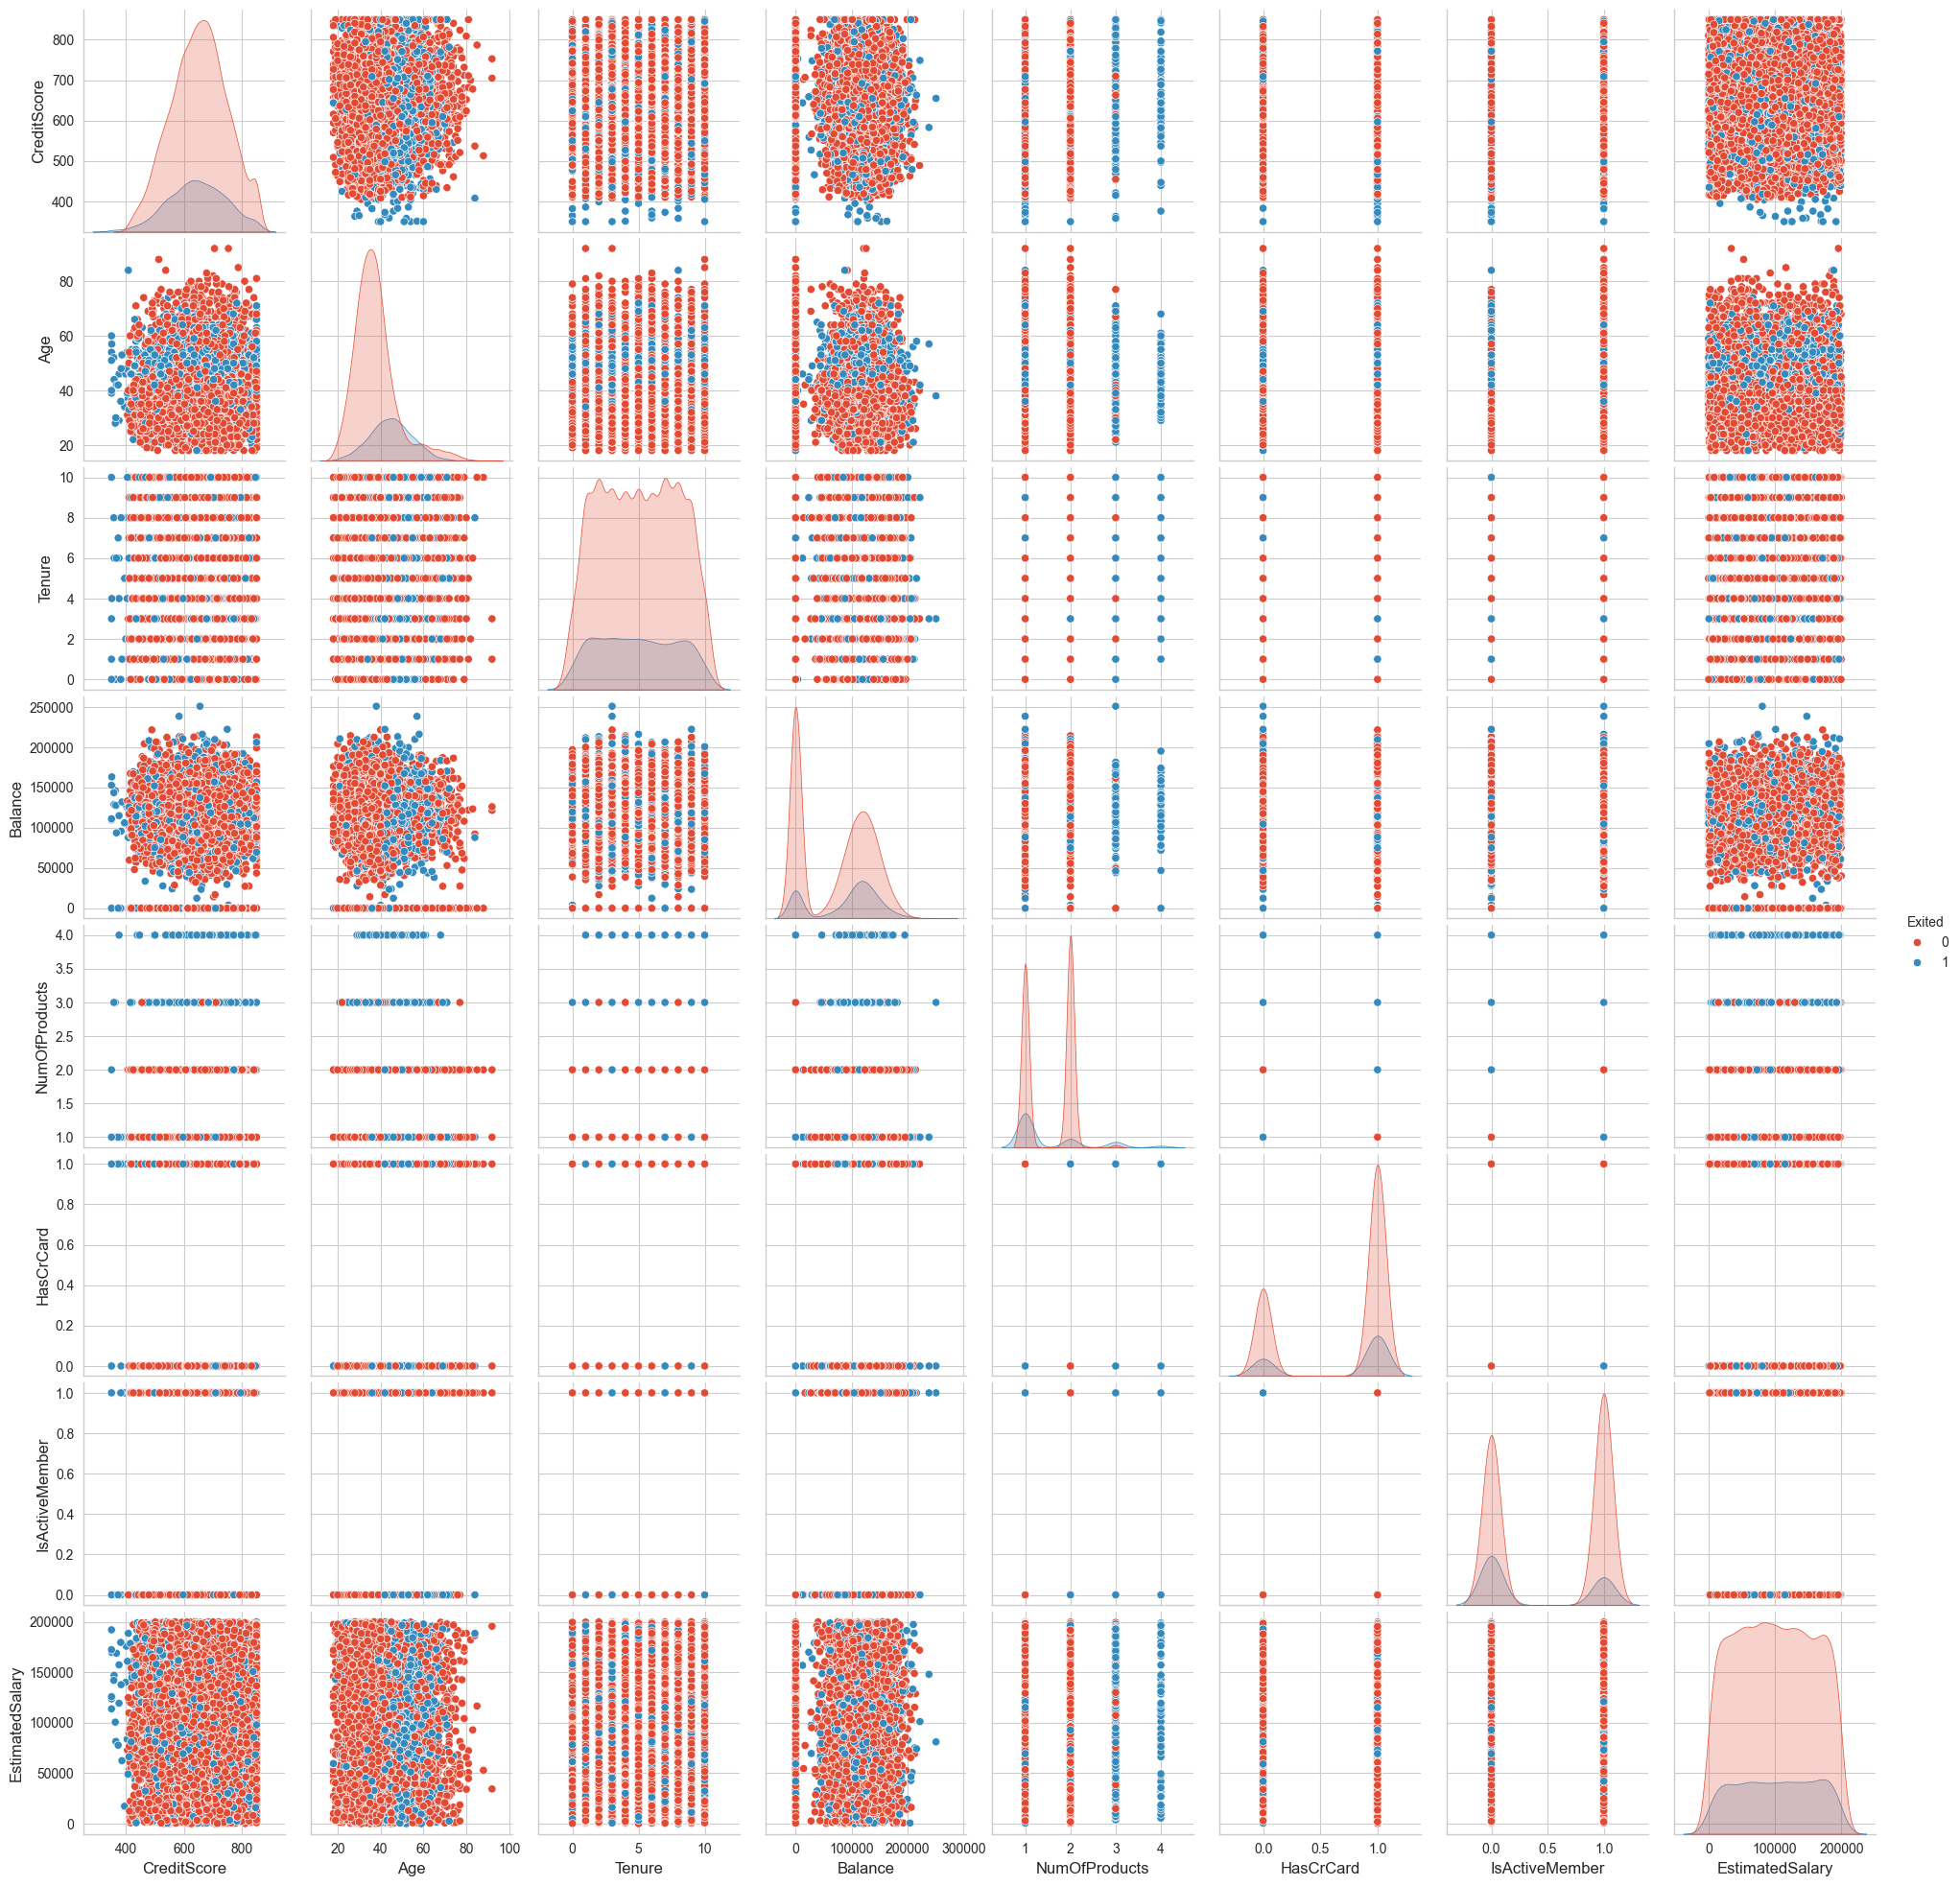

In [37]:
# sns.pairplot(df, hue = "Exited")
# plt.show()

In [38]:
new_df = pd.get_dummies(df, drop_first = True, dtype = "int")

In [40]:
new_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42.0,2,0.00,1,1.0,1.0,101348.88,1,0,0,0
1,608,41.0,1,83807.86,1,0.0,1.0,112542.58,0,0,1,0
2,502,42.0,8,159660.80,3,1.0,0.0,113931.57,1,0,0,0
3,699,39.0,1,0.00,2,0.0,0.0,93826.63,0,0,0,0
4,850,43.0,2,125510.82,1,0.0,1.0,79084.10,0,0,1,0


In [41]:
from imblearn.over_sampling import SMOTE

In [68]:
x = new_df.drop(columns = "Exited", axis = 1)
y = new_df["Exited"]

In [43]:
# x, y = SMOTE().fit_resample(x, y)

In [69]:
x.shape

(10000, 11)

In [70]:
y.shape

(10000,)

In [71]:
y.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [97]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42, stratify = y)

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


In [95]:
rfc = RandomForestClassifier(random_state=42)

In [98]:
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1)

In [99]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [106]:
best_rf = grid_search.best_estimator_

In [109]:
y_test_pred = best_rf.predict(x_test)

In [110]:
y_train_pred = best_rf.predict(x_train)

In [111]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [112]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2389
           1       0.80      0.47      0.59       611

    accuracy                           0.87      3000
   macro avg       0.84      0.72      0.76      3000
weighted avg       0.86      0.87      0.85      3000



In [113]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      5574
           1       0.94      0.65      0.77      1426

    accuracy                           0.92      7000
   macro avg       0.93      0.82      0.86      7000
weighted avg       0.92      0.92      0.91      7000



In [115]:
confusion_matrix(y_train, y_train_pred)

array([[5519,   55],
       [ 500,  926]], dtype=int64)

In [121]:
from scipy.stats import probplot, shapiro

((array([-3.81060943, -3.58545756, -3.46184782, ...,  3.46184782,
          3.58545756,  3.81060943]),
  array([350, 350, 350, ..., 850, 850, 850], dtype=int64)),
 (96.39677170073686, 650.5288, 0.9970389531762497))

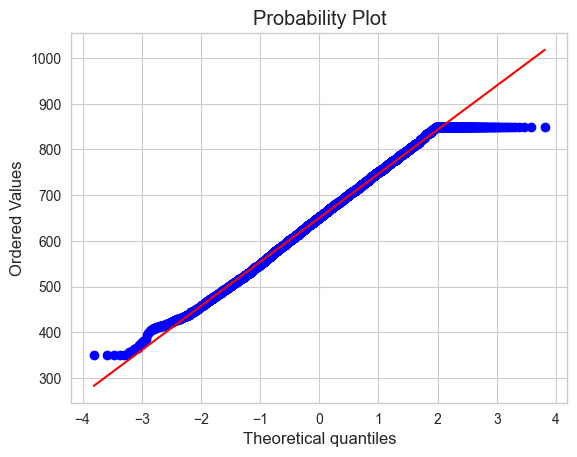

In [118]:
probplot(df["CreditScore"] , dist = "norm", plot = plt)

In [125]:
stat , p_value = shapiro(df["CreditScore"])
"norm" if p_value > 0.05 else "not"

'not'